## SIR model in python

In [19]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
pd.options.display.float_format = '{:.0f}'.format 
from IPython.display import HTML

 ### Loading data (28-03-2020)

In [20]:
ts_c = pd.read_csv("data/time_series_covid19_confirmed_global.csv")
ts_r = pd.read_csv("data/time_series_covid19_recovered_global.csv")
ts_d = pd.read_csv("data/time_series_covid19_deaths_global.csv")

### Generate a SIR model for Spain

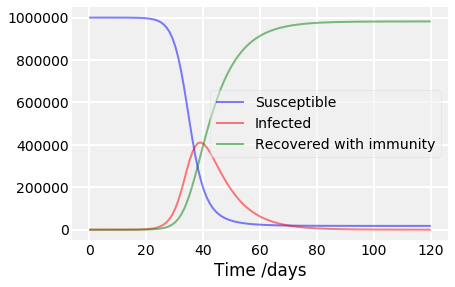

In [21]:
# Total population, N.
N = 1000000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = .512, 1./8
# A grid of time points (in days)
t = np.linspace(0, 120, 120)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
# ax.set_xlim(0,90)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [22]:
ts_c_spain = ts_c[ts_c["Country/Region"]=="Spain"]
ts_c_spain_tidy = ts_c_spain.iloc[:,35:].T.rename(columns={201: "confirmed"})

ts_r_spain = ts_r[ts_r["Country/Region"]=="Spain"]
ts_r_spain_tidy = ts_r_spain.iloc[:,35:].T.rename(columns={199: "recovered"})

ts_d_spain = ts_d[ts_d["Country/Region"]=="Spain"]
ts_d_spain_tidy = ts_d_spain.iloc[:,35:].T.rename(columns={201: "deaths"})


In [23]:
spain_covid = pd.concat([ts_c_spain_tidy, ts_r_spain_tidy, ts_d_spain_tidy], axis=1, sort=False).reset_index()
spain_covid["infected"] = spain_covid["confirmed"] - spain_covid["recovered"] - spain_covid["deaths"]

In [24]:
spain_covid["daily_deaths"] = spain_covid["deaths"].diff()

In [25]:
spain_covid.tail()

,index,confirmed,recovered,deaths,infected,daily_deaths
31,3/24/20,39885,3794,2808,33283,497
32,3/25/20,49515,5367,3647,40501,839
33,3/26/20,57786,7015,4365,46406,718
34,3/27/20,65719,9357,5138,51224,773
35,3/28/20,73235,12285,5982,54968,844


In [26]:
spain_covid_infected = spain_covid[["infected"]]

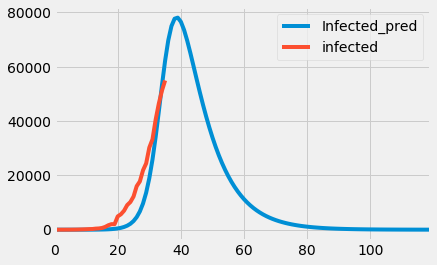

In [27]:
#Plotting Spain infected
#Adjusting the reported infected as 19% of the total as Spain is just testing severe and critical patients
infected_estimation = pd.DataFrame(I*0.19, columns=["Infected_pred"]) 
infected_estimation.iloc[:30,:]

combined = infected_estimation.merge(spain_covid_infected, left_index = True, right_index = True, how = 'left')


combined.plot()

(0, 55968.0)

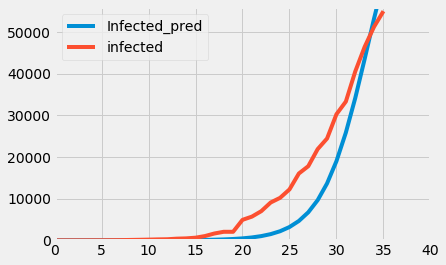

In [28]:
ax = combined.plot()
ax.set_xlim(0,40)
ax.set_ylim(0,max(combined["infected"]+1000))

In [29]:
combined[["Infected_pred", "infected"]].iloc[:60]

,Infected_pred,infected
0,0,0
1,0,0
2,0,0
3,1,4
4,1,11
5,1,13
6,2,30
7,3,43
8,4,82
9,6,118


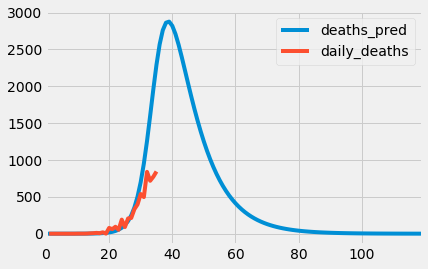

In [30]:
#Plotting Spain deaths
spain_covid_deaths = spain_covid.iloc[:spain_covid.shape[0],:][["daily_deaths"]]

#Adjusting the deaths estimation as 0.7% of the total infected as South Korea is reporting
deaths_estimation = pd.DataFrame(I*0.007, columns=["deaths_pred"])

combined_d = deaths_estimation.merge(spain_covid_deaths, left_index = True, right_index = True, how = 'left')


combined_d.plot()

(0, 1844.0)

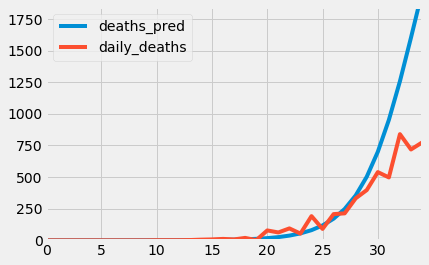

In [31]:
ax = combined_d.fillna(0).plot()
ax.set_xlim(0,34)
ax.set_ylim(0,max(combined_d["daily_deaths"].fillna(0)+1000))


In [32]:
combined_d[:40].fillna(0)

,deaths_pred,daily_deaths
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0
